# Import Necessary Libraries For Analysis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Add Relevant CSV files For The Dataset.

 NOTE (The files do not need path specification, it uses a github repo) https://github.com/ir89004/IS392---NBA-CSVs

In [ ]:
def load_data(file_urls):
    """Load and combine NBA player stats from multiple CSVs."""
    dataframes = [
        pd.read_csv(url, encoding='ISO-8859-1', delimiter=';').assign(Season=season)
        for season, url in file_urls.items()
    ]
    return pd.concat(dataframes, ignore_index=True)

file_urls = {
    "2021-2022": "https://github.com/ir89004/IS392---NBA-CSVs/raw/main/2021-2022%20NBA%20Player%20Stats%20-%20Playoffs.csv",
    "2022-2023": "https://github.com/ir89004/IS392---NBA-CSVs/raw/main/2022-2023%20NBA%20Player%20Stats%20-%20Playoffs.csv",
    "2023-2024": "https://github.com/ir89004/IS392---NBA-CSVs/raw/main/2023-2024%20NBA%20Player%20Stats%20-%20Playoffs.csv"
}
merged_data = load_data(file_urls)

Clean and Preprocess Data


In [ ]:
relevant_columns = ['PTS', 'BLK', 'TRB', 'AST', 'STL', 'FG', 'FGA', 'FG%']
data = merged_data[relevant_columns].dropna()

Standardize data

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns=relevant_columns)

# Determine Optimal Clusters (Elbow Method)

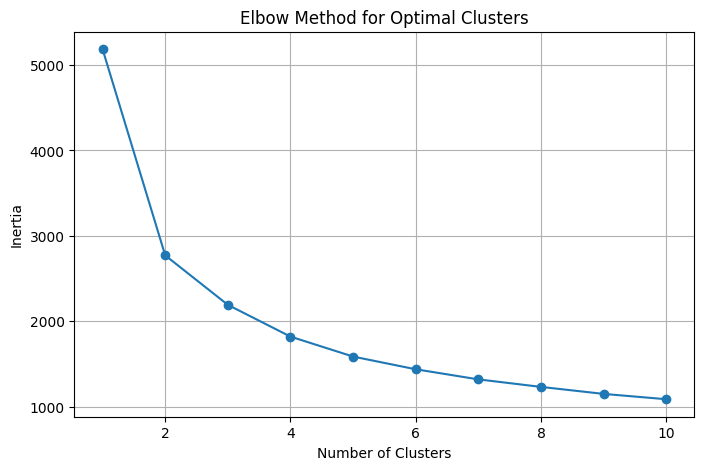

In [ ]:
def determine_optimal_clusters(data, max_clusters=10):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return inertia

inertia = determine_optimal_clusters(data_scaled)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Apply K-Means Clustering

In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
data_scaled_df['Cluster'] = kmeans.fit_predict(data_scaled)
merged_data['Cluster'] = data_scaled_df['Cluster']

### Analyze Clusters

In [ ]:
cluster_summary = merged_data.groupby('Cluster')[relevant_columns].mean()
print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
               PTS       BLK       TRB       AST       STL        FG  \
Cluster                                                                
0        24.073034  0.698876  6.900000  5.707865  1.216854  8.638202   
1         2.587613  0.121450  1.364955  0.562236  0.224773  0.941390   
2        11.101754  0.615351  5.090351  2.181579  0.785088  4.110088   

               FGA       FG%  
Cluster                       
0        18.656180  0.462281  
1         2.406344  0.356622  
2         8.792544  0.480851  


### Visualize Clusters

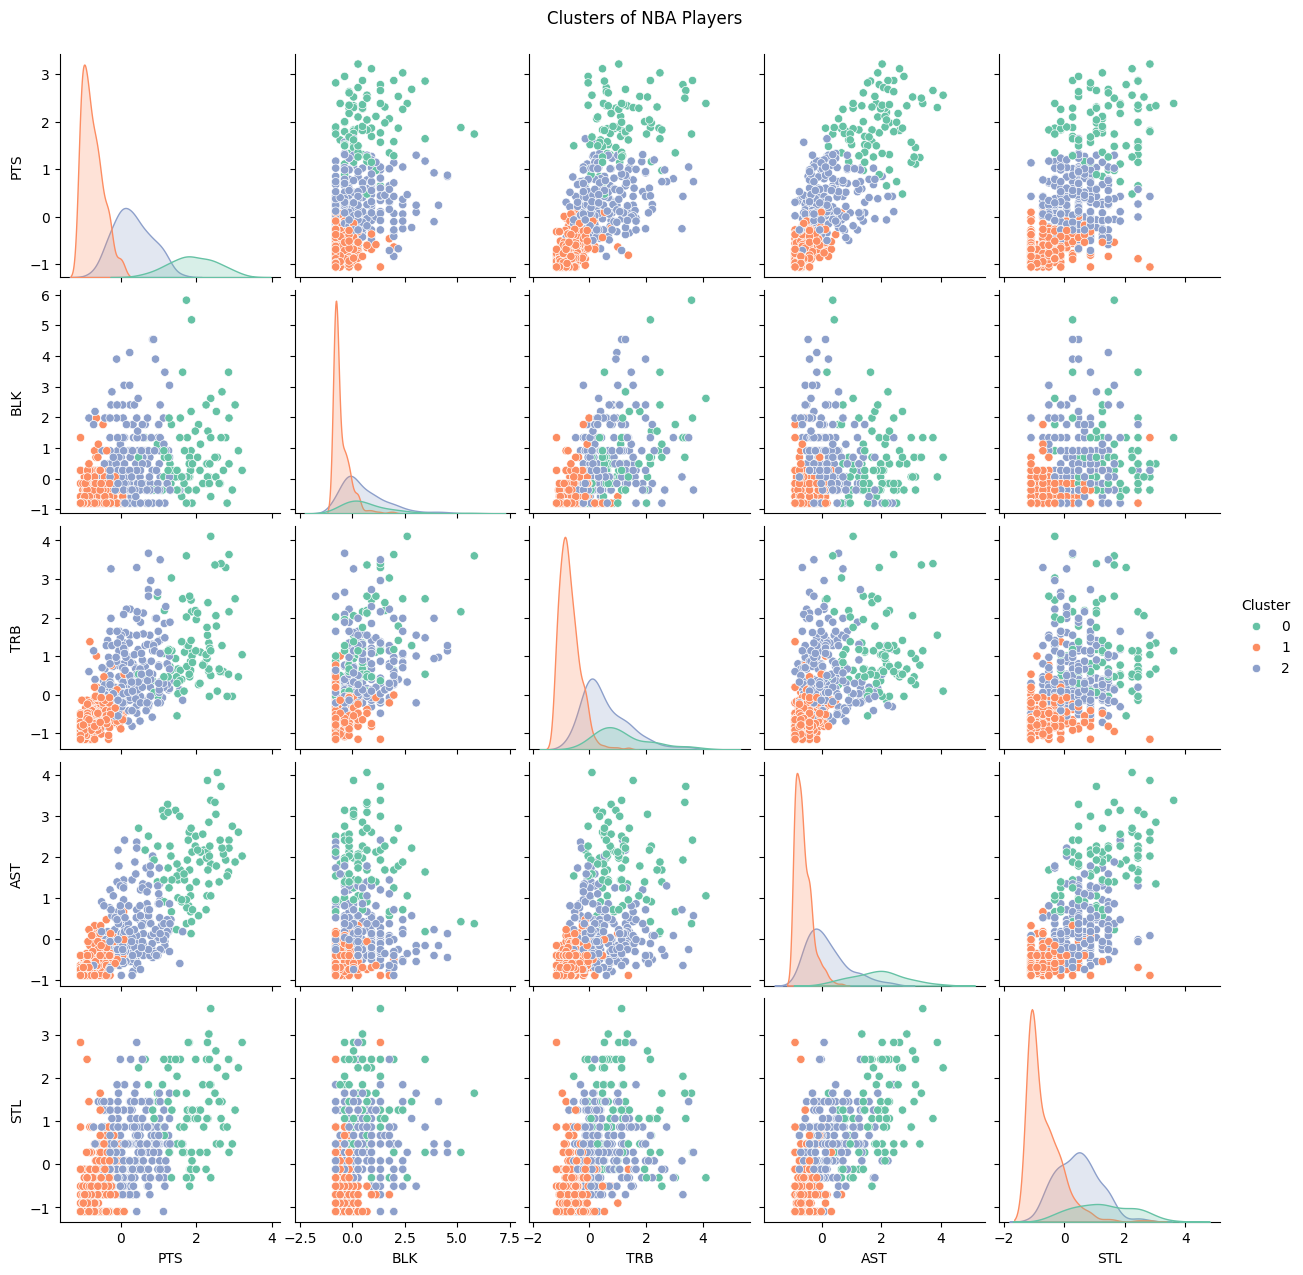

In [ ]:
sns.pairplot(
    data_scaled_df,
    vars=['PTS', 'BLK', 'TRB', 'AST', 'STL'],
    hue='Cluster',
    palette='Set2',
    diag_kind='kde',
    height=2.5
)
plt.suptitle('Clusters of NBA Players', y=1.02)
plt.show()

# Player Specific Analysis

Player-Specific Analysis:

Cluster 2 Players:
                 Player   PTS  BLK  TRB  AST  STL
382       Norman Powell  21.8  0.4  3.0  2.2  0.8
99      De'Andre Hunter  21.2  0.2  3.8  0.6  0.8
230          RJ Barrett  19.3  0.2  4.5  2.8  0.8
623  Karl-Anthony Towns  19.1  0.2  9.0  2.6  0.8
356          Malik Monk  19.0  0.4  5.4  3.6  0.7


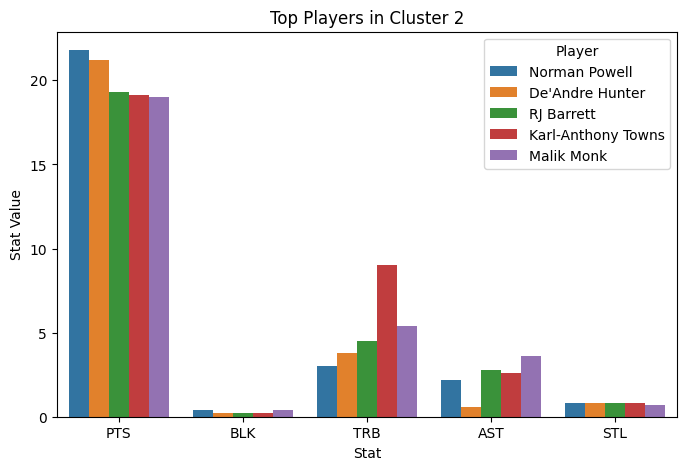


Cluster 1 Players:
                Player  PTS  BLK  TRB  AST  STL
550       Terance Mann  9.3  0.0  5.0  1.8  0.0
100       Bones Hyland  9.2  0.0  2.0  3.2  0.2
391    Duncan Robinson  9.0  0.1  1.5  1.7  0.3
386  Immanuel Quickley  9.0  0.0  1.6  1.0  0.5
308       Bones Hyland  8.6  0.2  0.8  0.8  0.8


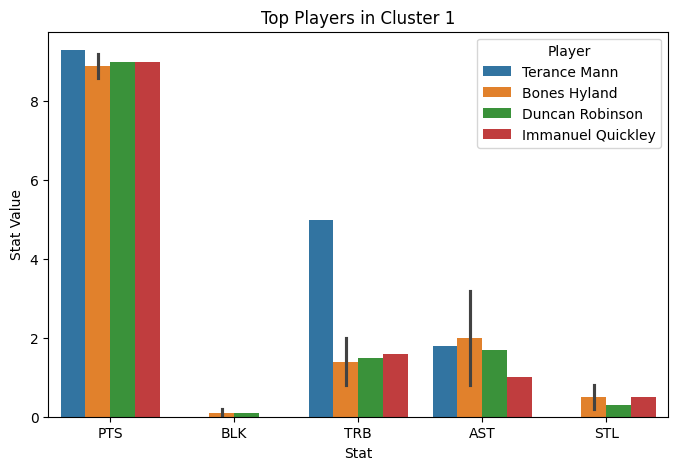


Cluster 0 Players:
                    Player   PTS  BLK   TRB  AST  STL
330          Kawhi Leonard  34.5  0.5   6.5  6.0  2.0
237           Devin Booker  33.7  0.8   4.8  7.2  1.7
480            Joel Embiid  33.0  1.5  10.8  5.7  1.2
461          Jalen Brunson  32.4  0.2   3.3  7.5  0.8
7    Giannis Antetokounmpo  31.7  1.3  14.2  6.8  0.7


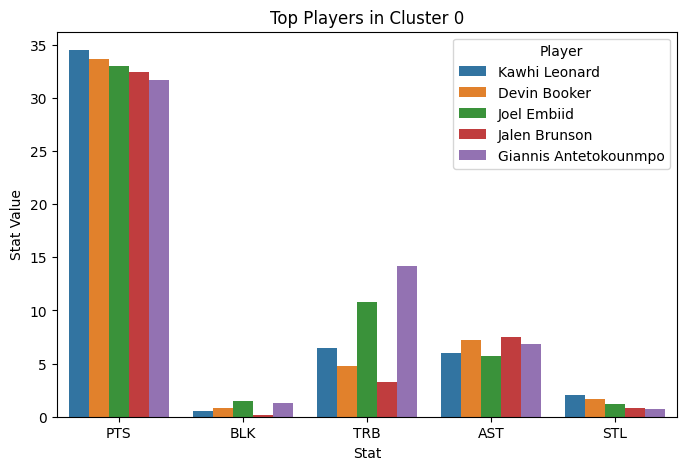

In [ ]:
print("Player-Specific Analysis:")
for cluster in merged_data['Cluster'].unique():
    print(f"\nCluster {cluster} Players:")
    cluster_players = merged_data[merged_data['Cluster'] == cluster]
    top_players = cluster_players.sort_values('PTS', ascending=False).head(5)  # Top 5 players by points
    print(top_players[['Player', 'PTS', 'BLK', 'TRB', 'AST', 'STL']])

    # Visualization: Top Players in Each Cluster
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=top_players.melt(id_vars=['Player'], value_vars=['PTS', 'BLK', 'TRB', 'AST', 'STL']),
        x='variable', y='value', hue='Player'
    )
    plt.title(f'Top Players in Cluster {cluster}')
    plt.ylabel('Stat Value')
    plt.xlabel('Stat')
    plt.legend(title='Player')
    plt.show()

# Seasonal Trends


Seasonal Trends:
                         PTS       BLK       TRB       AST       STL  \
Season    Cluster                                                      
2021-2022 0        22.924138  0.658621  6.779310  5.482759  1.168966   
          1         2.629245  0.110377  1.454717  0.566981  0.251887   
          2        10.874390  0.580488  4.730488  2.167073  0.808537   
2022-2023 0        24.321875  0.771875  6.990625  5.921875  1.325000   
          1         2.552294  0.117431  1.166055  0.525688  0.197248   
          2        10.936842  0.589474  5.197368  2.118421  0.732895   
2023-2024 0        24.978571  0.657143  6.921429  5.696429  1.142857   
          1         2.582759  0.135345  1.469828  0.592241  0.225862   
          2        11.547143  0.684286  5.395714  2.267143  0.814286   

                         FG        FGA       FG%  
Season    Cluster                                 
2021-2022 0        8.003448  17.817241  0.449000  
          1        0.973585   2.3877

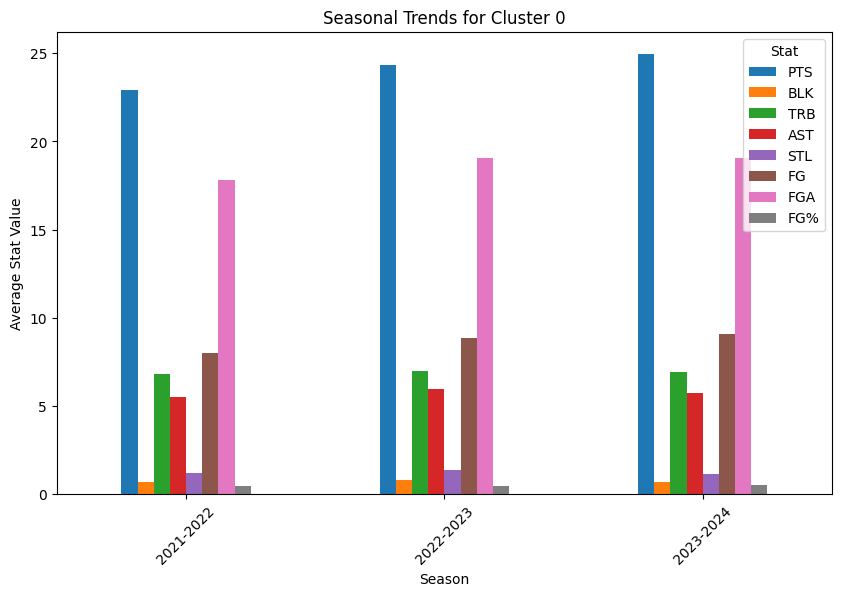

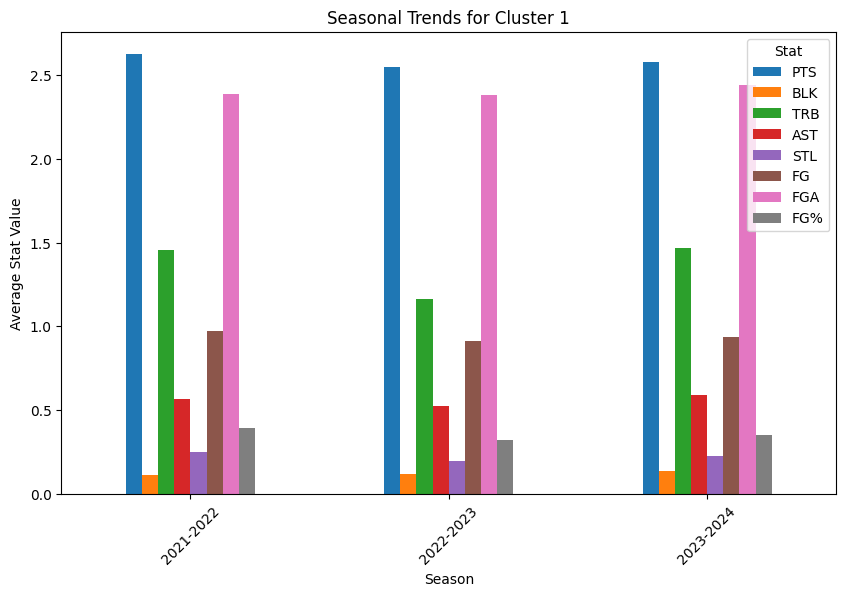

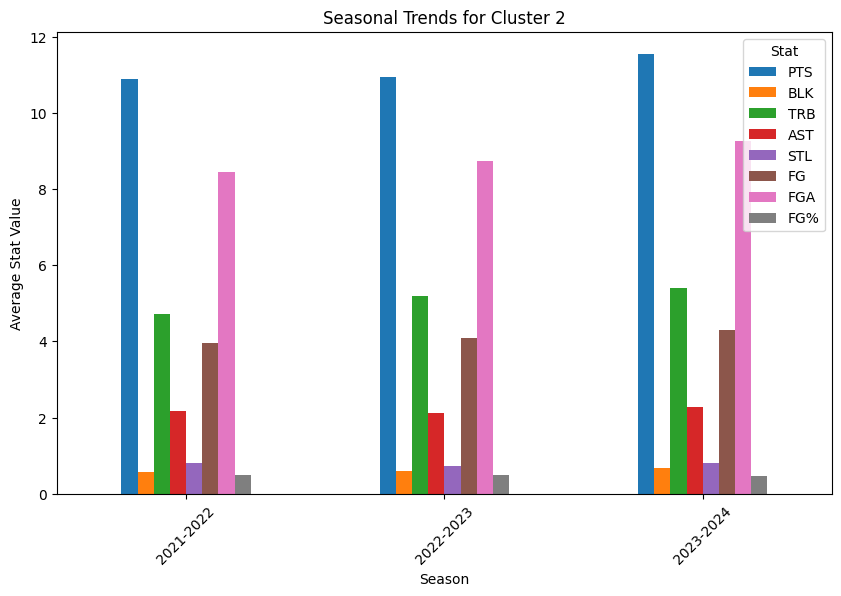

In [ ]:
seasonal_trends = merged_data.groupby(['Season', 'Cluster'])[relevant_columns].mean()
print("\nSeasonal Trends:")
print(seasonal_trends)

# Visualization: Seasonal Trends
for cluster in seasonal_trends.index.levels[1]:
    cluster_data = seasonal_trends.xs(cluster, level='Cluster')
    cluster_data.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Seasonal Trends for Cluster {cluster}')
    plt.ylabel('Average Stat Value')
    plt.xlabel('Season')
    plt.xticks(rotation=45)
    plt.legend(title='Stat')
    plt.show()

# Apply Dimension Reduction with PCA (Visualizing Clusters in 2D/3D)

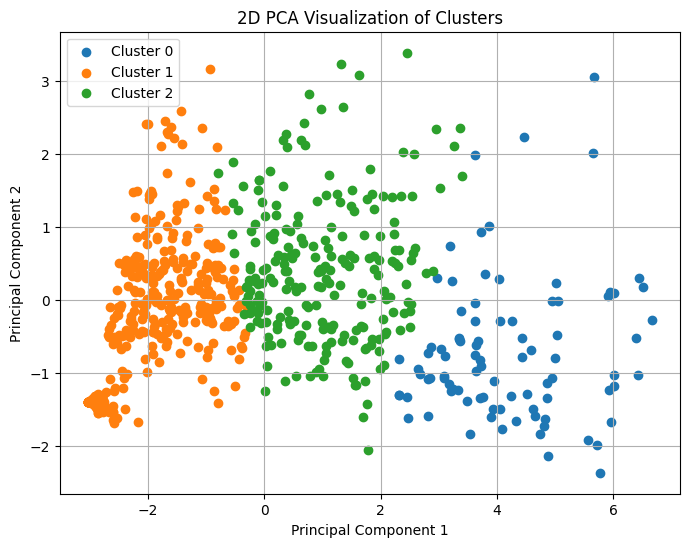

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
for cluster in set(kmeans.labels_):
    cluster_points = data_pca[kmeans.labels_ == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('2D PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Advanced Metrics

## Player Efficiency Rating or Usage Rate = PER

In [ ]:
merged_data['PER'] = (
    merged_data['PTS'] + merged_data['TRB'] + merged_data['AST'] +
    merged_data['STL'] + merged_data['BLK'] -
    (merged_data['FGA'] - merged_data['FG']) - merged_data['TOV']
)

print("Top Players by PER:")
print(merged_data.sort_values('PER', ascending=False).head(10))


Top Players by PER:
      Rk                 Player Pos  Age   Tm   G  GS    MP    FG   FGA  ...  \
316  100           Nikola Joki?   C   27  DEN  20  20  39.5  11.4  20.7  ...   
531   98           Nikola Joki?   C   28  DEN  12  12  40.2  11.1  20.3  ...   
471   38          Anthony Davis   C   30  LAL   5   5  41.6  11.8  18.6  ...   
109  110           Nikola Joki?   C   26  DEN   5   5  34.2  12.2  21.2  ...   
7      8  Giannis Antetokounmpo  PF   27  MIL  12  12  37.3  11.7  23.8  ...   
330  114          Kawhi Leonard  SF   31  LAC   2   2  40.0  12.0  22.0  ...   
237   21           Devin Booker  SG   26  PHO  11  11  41.7  12.8  21.9  ...   
480   47            Joel Embiid   C   29  PHI   6   6  41.3   9.8  22.2  ...   
526   93           LeBron James  PF   39  LAL   5   5  40.8  11.2  19.8  ...   
265   49          Anthony Davis   C   29  LAL  16  16  38.0   8.3  15.9  ...   

      TRB  AST  STL  BLK  TOV   PF   PTS     Season  Cluster   PER  
316  13.5  9.5  1.1  1.0  3.5 

## Player Similarity Matching

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(data_scaled)

# Example: Find most similar players to a given player
player_index = 312  # Replace with index of the player you want to analyze
similar_players = similarity_matrix[player_index].argsort()[-6:][::-1]  # Top 5 similar players

print("Most Similar Players:")
for idx in similar_players:
    if idx != player_index:
        print(merged_data.iloc[idx]['Player'])

Most Similar Players:
Jayson Tatum
Pascal Siakam
Nikola Joki?
Jayson Tatum
Joel Embiid


## Positional Analysis



Positional Analysis:
                   PTS       BLK        TRB       AST       STL        FG  \
Pos Cluster                                                                 
C   0        24.500000  1.330769  11.892308  4.515385  0.923077  9.084615   
    1         2.246552  0.231034   1.924138  0.394828  0.136207  0.874138   
    2         9.909615  0.975000   7.421154  1.469231  0.667308  3.901923   
PF  0        24.780000  0.800000   8.093333  5.553333  1.166667  9.026667   
    1         2.470423  0.118310   1.429577  0.474648  0.177465  0.888732   
    2        10.663462  0.680769   5.800000  1.815385  0.700000  3.963462   
PG  0        23.230303  0.512121   5.142424  6.681818  1.412121  8.227273   
    1         2.700000  0.072917   0.889583  0.893750  0.260417  0.966667   
    2        10.378788  0.300000   3.060606  3.972727  0.939394  3.715152   
SF  0        24.046154  0.507692   6.807692  5.138462  1.123077  8.484615   
    1         2.404000  0.104000   1.249333  0.460000 

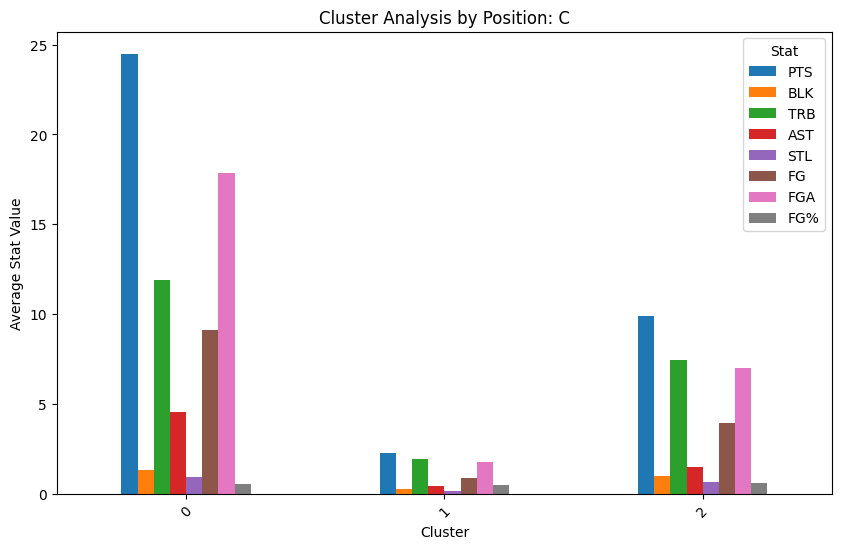

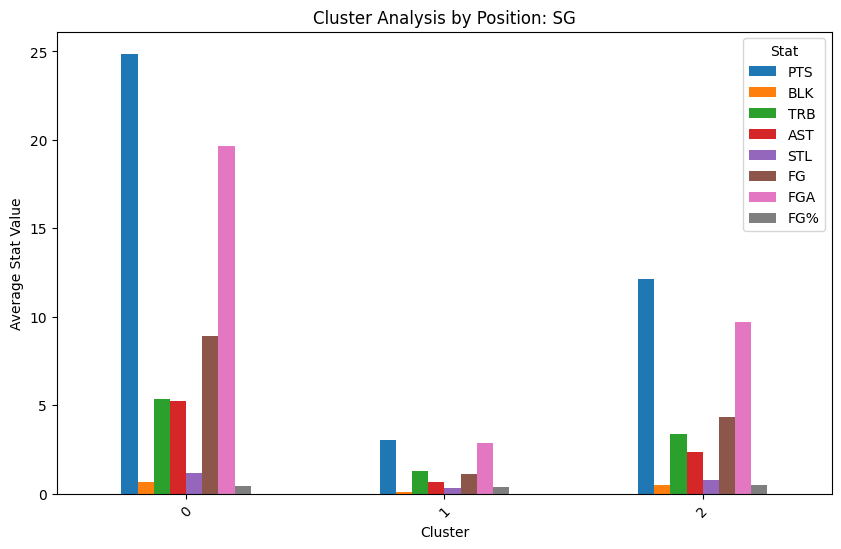

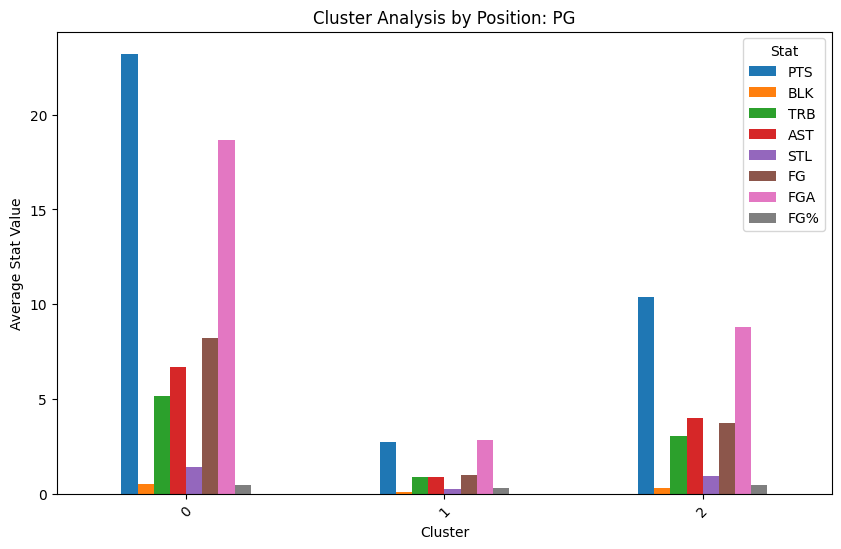

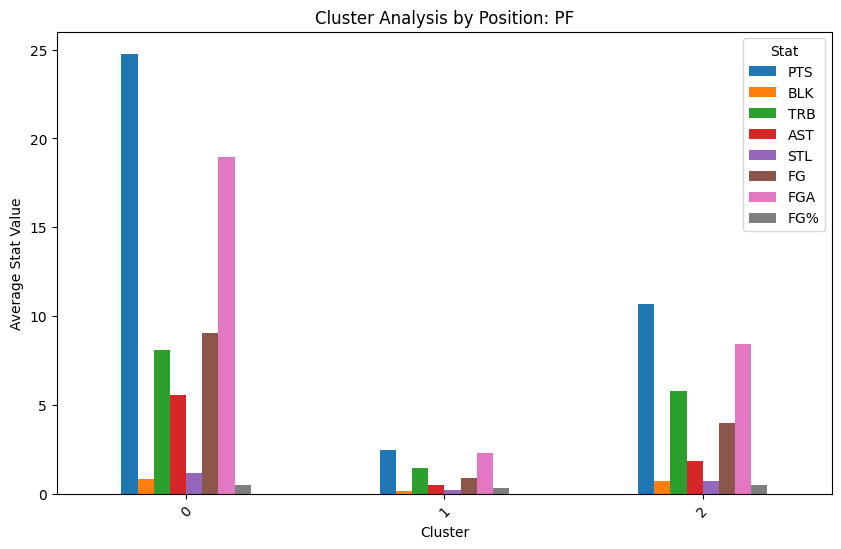

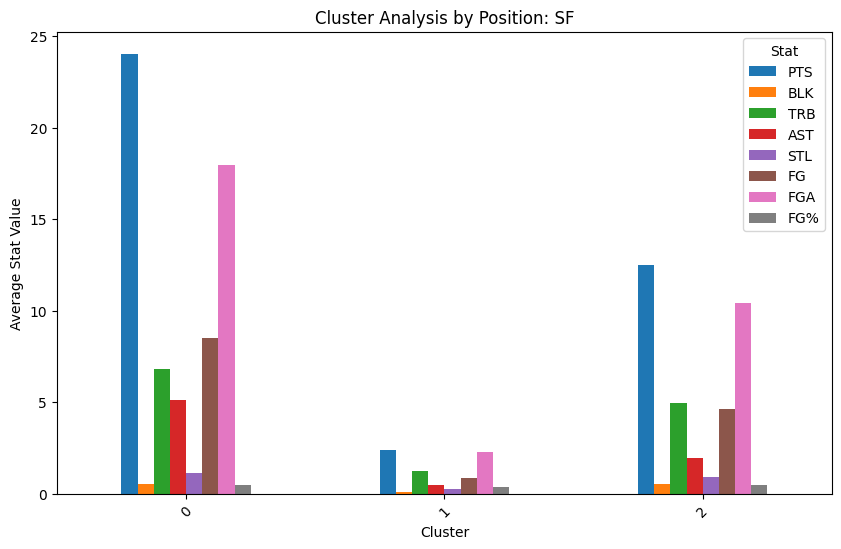

In [ ]:
position_clusters = merged_data.groupby(['Pos', 'Cluster'])[relevant_columns].mean()
print("\nPositional Analysis:")
print(position_clusters)

# Visualization: Positional Analysis
for position in merged_data['Pos'].unique():
    position_data = position_clusters.xs(position, level='Pos')
    position_data.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Cluster Analysis by Position: {position}')
    plt.ylabel('Average Stat Value')
    plt.xlabel('Cluster')
    plt.xticks(rotation=45)
    plt.legend(title='Stat')
    plt.show()

In [ ]:
print("Player at index 0:")
print(merged_data.iloc[312]['Player'])


Player at index 0:
LeBron James
